## Letter Recognition:

* The Letter Recognition dataset consist of 20,000 data samples with 16 input values and one target value for each sample.
* The main objective of this project is to model a keras neural network to predict the letter/alphabet when 16 features are inputed.
* Initially, the dataset is analysed to understand it, and then the step by step process for building the neural network is applied. 
* Here, variety of different architecture variations and various hyperparameters are also considered.

#### Importing Libraries:

In [2]:
# importing required libraries

import numpy as np
import pandas as pd
import random
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from keras.models import Sequential
from keras import layers
from keras import regularizers

#### Loding Dataset to Dataframe:

In [3]:
# loading the dataset from CSV file

data = pd.read_csv('letter-recognition.csv')
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


#### Data Understanding:

In [4]:
# finding the count of samples for each alphabet 
# Please execute only once

data['letter'].value_counts()

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
Q    783
N    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: letter, dtype: int64

In [5]:
#Converting the Alphabet into its corresponding number starting from 0

data.letter = [ ord(x) - 65 for x in data.letter ]
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [6]:
data.describe()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,12.516750,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,7.502175,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,6.000000,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,13.000000,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,19.000000,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,25.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


The above results show that the letter recognition dataset doesn't have any null or missing values

#### Data Visualization:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA17EAD148>,
      dtype=object)

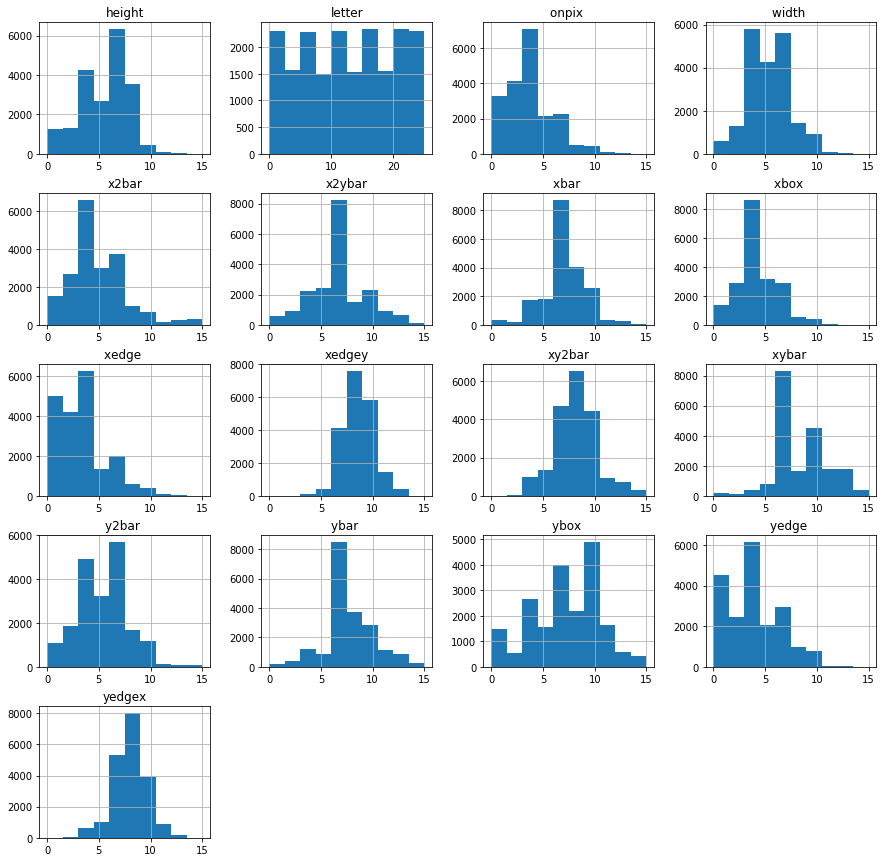

In [7]:
#Distribution bar graphs for each column
data.hist(figsize=(15,15))

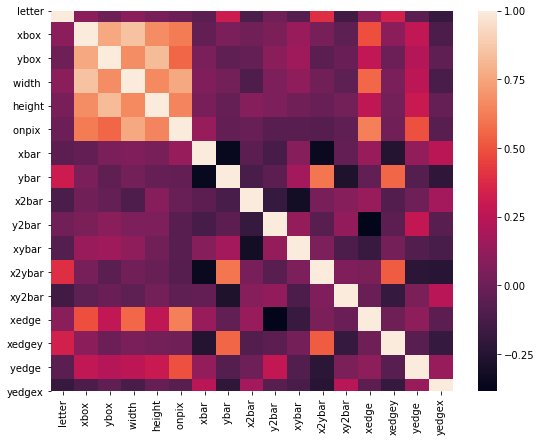

In [8]:
# Heatmap of Correlation matrix of all features
plt.figure(figsize = (9,7))
sns.heatmap(data.corr())

 #### Data Preparation & Normalization:

In [9]:
# Checking the data for null or missing values

data.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [10]:
# Checking the data for null or missing values

data.notnull().sum()

letter    20000
xbox      20000
ybox      20000
width     20000
height    20000
onpix     20000
xbar      20000
ybar      20000
x2bar     20000
y2bar     20000
xybar     20000
x2ybar    20000
xy2bar    20000
xedge     20000
xedgey    20000
yedge     20000
yedgex    20000
dtype: int64

In [11]:
# split into input (X) and output (y) variables

X = data.drop('letter',axis=1)
y = data['letter']
X.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [12]:
y.head()

0    19
1     8
2     3
3    13
4     6
Name: letter, dtype: int64

In [13]:
# Spliting dataset into training (70%) and test (30%) set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 0)

In [14]:
# Normalizing train and test data separately
# min-max normalization 
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)
print("Train: min-max Normalization Range:", np.amin(X_train_minmax),"-", np.amax(X_train_minmax))
print("Test: min-max Normalization Range:", np.amin(X_test_minmax),"-", np.amax(X_test_minmax))

Train: min-max Normalization Range: 0.0 - 1.0
Test: min-max Normalization Range: 0.0 - 1.0


In [15]:
# Normalizing train and test data separately
# Z Normalization  
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.fit_transform(X_test)
print("Train: Z Normalization Range:", np.amin(X_train_norm),"-", np.amax(X_train_norm))
print("Test: Z Normalization Range:", np.amin(X_test_norm),"-", np.amax(X_test_norm))

Train: Z Normalization Range: -5.404615288017298 - 5.739363196435594
Test: Z Normalization Range: -4.717728987393372 - 5.2779433735853925


#### Generators without and with Data Augmentation: Total 2 in number

In [16]:
#Creating generator to break the dataset into blocks
#Not including Data Augmentation
def myGenerator(features, label, batch_size):
    '''This generator splits the dataset into blocks 
    of specified batch size. Without Data Augmentation'''

    num_samples = len(label)
    #features = features.to_numpy()
    label = label.to_numpy()
    #print(features, label)
    while True: # Loop forever so the generator never terminates

        for offset in range(0, num_samples, batch_size):
            #print("Range", offset, "-" , offset+batch_size)
            # Gets the samples you'll use in this batch
            X_batch = features[offset:offset+batch_size]
            y_batch = label[offset:offset+batch_size]
            
            # The generator-y part: yield the next training batch            
            yield X_batch, y_batch

In [17]:
#Creating custom generator with data augmentation

def myGenAugmentNoise(features, label, batch_size):
    
    '''This generator adds a random floating value from -1 to 1 to 
    each & every feature value. The label values are not altered.'''

    num_samples = len(label)
    #features = features.to_numpy()
    label = label.to_numpy()

    while True: # Loop forever so the generator never terminates

        for offset in range(0, num_samples, batch_size):
            #print("Range", offset, "-" , offset+batch_size)
            # Get the samples you'll use in this batch
            X_batch = features[offset:offset+batch_size]
            y_batch = label[offset:offset+batch_size]
            
            # Initialise X_train and y_train arrays for this batch
            X_train = []
            y_train = []
            
            # For each example
            for i in range(offset, offset+batch_size):
                row = []
                for j in range(len(features[0])):
                    row.append(features[i][j] + random.uniform(-1.0, 1.0))
                X_train.append(row)
                y_train.append(label[i])

            # Make sure they're numpy arrays (as opposed to lists)
            X_train = np.array(X_train)
            y_train = np.array(y_train)

            # The generator-y part: yield the next training batch            
            yield X_train, y_train

In [18]:
#Generator objects for train data
#Z normalized data
train_gen11 = myGenerator(X_train_norm, y_train, 1000)
train_gen21 = myGenAugmentNoise(X_train_norm, y_train, 1000)

#min-max normalized data
train_gen12 = myGenerator(X_train_minmax, y_train, 1000)
train_gen22 = myGenAugmentNoise(X_train_minmax, y_train, 1000)

In [19]:
#Generator objects for test data
#Z normalized data
test_gen11 = myGenerator(X_test_norm, y_test, 1000)
test_gen21 = myGenAugmentNoise(X_test_norm, y_test, 1000)

#min-max normalized data
test_gen12 = myGenerator(X_test_minmax, y_test, 1000)
test_gen22 = myGenAugmentNoise(X_test_minmax, y_test, 1000)

#### Keras Model Building:
##### Variation 1:
* Architecture: **Perceptron**
* Activation Function: **Softmax**
* Loss Function: **sparse_categorical_crossentropy**
* Optimiser: **rmsprop**


In [20]:
# defining network model

model1 = Sequential() # model as a list (sequence) of layers
model1.add(layers.Dense(units = 26, activation = tf.nn.softmax, input_dim = 16))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 26)                442       
Total params: 442
Trainable params: 442
Non-trainable params: 0
_________________________________________________________________


In [21]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

**Model 1 witout using generator:**

In [22]:
# Training the model
#Witout generator # Z normalization

model1.fit(X_train_norm, y_train, batch_size = 200, epochs = 10)


Epoch 1/10
14000/14000 [==============================] - 0s 18us/step - loss: 3.3535 - accuracy: 0.0914
Epoch 2/10
14000/14000 [==============================] - 0s 12us/step - loss: 2.9807 - accuracy: 0.1772
Epoch 3/10
14000/14000 [==============================] - 0s 12us/step - loss: 2.6894 - accuracy: 0.2626
Epoch 4/10
14000/14000 [==============================] - 0s 12us/step - loss: 2.4556 - accuracy: 0.3439
Epoch 5/10
14000/14000 [==============================] - 0s 12us/step - loss: 2.2648 - accuracy: 0.4139
Epoch 6/10
14000/14000 [==============================] - 0s 12us/step - loss: 2.1074 - accuracy: 0.4686
Epoch 7/10
14000/14000 [==============================] - 0s 12us/step - loss: 1.9765 - accuracy: 0.5144
Epoch 8/10
14000/14000 [==============================] - 0s 13us/step - loss: 1.8663 - accuracy: 0.5497
Epoch 9/10
14000/14000 [==============================] - 0s 14us/step - loss: 1.7729 - accuracy: 0.5752
Epoch 10/10
14000/14000 [=============================

In [23]:
test_loss, test_acc = model1.evaluate(X_test_norm, y_test)

print('Test Data accuracy:', test_acc)

6000/6000 [==============================] - 0s 32us/step
Test Data accuracy: 0.6104999780654907


In [24]:
# Training the model
#Witout generator #min-max Normalization

model1.fit(X_train_minmax, y_train, batch_size = 200, epochs = 10)

Epoch 1/10
14000/14000 [==============================] - 0s 9us/step - loss: 2.9583 - accuracy: 0.1129
Epoch 2/10
14000/14000 [==============================] - 0s 10us/step - loss: 2.8907 - accuracy: 0.3577
Epoch 3/10
14000/14000 [==============================] - 0s 12us/step - loss: 2.8472 - accuracy: 0.4904
Epoch 4/10
14000/14000 [==============================] - 0s 13us/step - loss: 2.8134 - accuracy: 0.5106
Epoch 5/10
14000/14000 [==============================] - 0s 13us/step - loss: 2.7834 - accuracy: 0.5201
Epoch 6/10
14000/14000 [==============================] - 0s 13us/step - loss: 2.7553 - accuracy: 0.5457
Epoch 7/10
14000/14000 [==============================] - 0s 13us/step - loss: 2.7283 - accuracy: 0.5354
Epoch 8/10
14000/14000 [==============================] - 0s 13us/step - loss: 2.7024 - accuracy: 0.5446
Epoch 9/10
14000/14000 [==============================] - 0s 16us/step - loss: 2.6768 - accuracy: 0.5472
Epoch 10/10
14000/14000 [==============================]

In [25]:
test_loss, test_acc = model1.evaluate(X_test_minmax, y_test)

print('Test Data accuracy:', test_acc)

6000/6000 [==============================] - 0s 28us/step
Test Data accuracy: 0.547166645526886


**Model 1 with generator 1:**

In [26]:
#Training the model
#With generator 1 # Z normalization

model1.fit_generator(train_gen11, steps_per_epoch = 14, epochs = 10)

Epoch 1/10
14/14 [==============================] - 0s 4ms/step - loss: 1.5467 - accuracy: 0.5498
Epoch 2/10
14/14 [==============================] - 0s 4ms/step - loss: 1.5071 - accuracy: 0.5636
Epoch 3/10
14/14 [==============================] - 0s 4ms/step - loss: 1.4753 - accuracy: 0.5774
Epoch 4/10
14/14 [==============================] - 0s 4ms/step - loss: 1.4473 - accuracy: 0.5869
Epoch 5/10
14/14 [==============================] - 0s 4ms/step - loss: 1.4221 - accuracy: 0.5988
Epoch 6/10
14/14 [==============================] - 0s 4ms/step - loss: 1.3996 - accuracy: 0.6084
Epoch 7/10
14/14 [==============================] - 0s 4ms/step - loss: 1.3793 - accuracy: 0.6186
Epoch 8/10
14/14 [==============================] - 0s 4ms/step - loss: 1.3612 - accuracy: 0.6296
Epoch 9/10
14/14 [==============================] - 0s 4ms/step - loss: 1.3449 - accuracy: 0.6386
Epoch 10/10
14/14 [==============================] - 0s 4ms/step - loss: 1.3302 - accuracy: 0.6464


In [27]:
test_loss, test_acc = model1.evaluate_generator(test_gen11, steps = 6)

print('Test Data accuracy:', test_acc)

Test Data accuracy: 0.656000018119812


In [28]:
#Training the model
#With generator 1 # min-max normalization

model1.fit_generator(train_gen12, steps_per_epoch = 14, epochs = 10)

Epoch 1/10
14/14 [==============================] - 0s 3ms/step - loss: 2.6757 - accuracy: 0.2792
Epoch 2/10
14/14 [==============================] - 0s 4ms/step - loss: 2.6560 - accuracy: 0.3479
Epoch 3/10
14/14 [==============================] - 0s 6ms/step - loss: 2.6410 - accuracy: 0.4182
Epoch 4/10
14/14 [==============================] - 0s 4ms/step - loss: 2.6285 - accuracy: 0.4821
Epoch 5/10
14/14 [==============================] - 0s 3ms/step - loss: 2.6177 - accuracy: 0.5294
Epoch 6/10
14/14 [==============================] - 0s 4ms/step - loss: 2.6080 - accuracy: 0.5641
Epoch 7/10
14/14 [==============================] - 0s 4ms/step - loss: 2.5993 - accuracy: 0.5836
Epoch 8/10
14/14 [==============================] - 0s 3ms/step - loss: 2.5911 - accuracy: 0.5906
Epoch 9/10
14/14 [==============================] - 0s 4ms/step - loss: 2.5833 - accuracy: 0.5974
Epoch 10/10
14/14 [==============================] - 0s 4ms/step - loss: 2.5759 - accuracy: 0.5996


In [29]:
test_loss, test_acc = model1.evaluate_generator(test_gen12, steps = 6)

print('Test Data accuracy:', test_acc)

Test Data accuracy: 0.6071666479110718


**Model 1 with generator 2:**

In [30]:
#Training the model
#With generator 2 # Z normalization

model1.fit_generator(train_gen21, steps_per_epoch = 14, epochs = 10)

Epoch 1/10
14/14 [==============================] - 1s 43ms/step - loss: 1.8582 - accuracy: 0.4654
Epoch 2/10
14/14 [==============================] - 1s 45ms/step - loss: 1.8264 - accuracy: 0.4720
Epoch 3/10
14/14 [==============================] - 1s 49ms/step - loss: 1.8165 - accuracy: 0.4723
Epoch 4/10
14/14 [==============================] - 1s 43ms/step - loss: 1.7903 - accuracy: 0.4774
Epoch 5/10
14/14 [==============================] - 1s 51ms/step - loss: 1.7730 - accuracy: 0.4791
Epoch 6/10
14/14 [==============================] - 1s 46ms/step - loss: 1.7511 - accuracy: 0.4901 0s - loss: 1.7466 - accuracy: 0.49
Epoch 7/10
14/14 [==============================] - 0s 35ms/step - loss: 1.7439 - accuracy: 0.4844
Epoch 8/10
14/14 [==============================] - 1s 52ms/step - loss: 1.7307 - accuracy: 0.4863 0s - loss: 1.7326 - accu
Epoch 9/10
14/14 [==============================] - 1s 39ms/step - loss: 1.7209 - accuracy: 0.4892
Epoch 10/10
14/14 [==============================

In [31]:
test_loss, test_acc = model1.evaluate_generator(test_gen21, steps = 6)

print('Test Data accuracy:', test_acc)

Test Data accuracy: 0.4945000112056732


In [32]:
#Training the model
#With generator 2 # min-max normalization

model1.fit_generator(train_gen21, steps_per_epoch = 14, epochs = 10)

Epoch 1/10
14/14 [==============================] - 1s 48ms/step - loss: 1.7167 - accuracy: 0.4939
Epoch 2/10
14/14 [==============================] - 0s 33ms/step - loss: 1.6978 - accuracy: 0.5009
Epoch 3/10
14/14 [==============================] - 1s 44ms/step - loss: 1.6973 - accuracy: 0.4988
Epoch 4/10
14/14 [==============================] - 1s 44ms/step - loss: 1.6873 - accuracy: 0.4991 0s - loss: 1.7004 - accu
Epoch 5/10
14/14 [==============================] - 1s 52ms/step - loss: 1.6763 - accuracy: 0.4951
Epoch 6/10
14/14 [==============================] - 1s 47ms/step - loss: 1.6833 - accuracy: 0.4972
Epoch 7/10
14/14 [==============================] - 1s 47ms/step - loss: 1.6705 - accuracy: 0.5021
Epoch 8/10
14/14 [==============================] - 1s 45ms/step - loss: 1.6696 - accuracy: 0.5031
Epoch 9/10
14/14 [==============================] - 0s 34ms/step - loss: 1.6624 - accuracy: 0.5066 0s - loss: 1.6657 - accuracy
Epoch 10/10
14/14 [==============================] - 1s

In [33]:
test_loss, test_acc = model1.evaluate_generator(test_gen22, steps = 6)

print('Test Data accuracy:', test_acc)

Test Data accuracy: 0.0871666669845581


##### Variation 2:
* Architecture: **3 Hidden layers**
* Hidden Activation Function: **Relu**
* Activation Function: **Softmax**
* Loss Function: **sparse_categorical_crossentropy**
* Optimiser: **adam**

In [34]:
# defining network model

model3 = Sequential() # model as a list (sequence) of layers
model3.add(layers.Dense(units = 54, activation = tf.nn.relu, input_dim = 16))
model3.add(layers.Dense(units = 48, activation = tf.nn.relu))
model3.add(layers.Dense(units = 32, activation = tf.nn.relu))
model3.add(layers.Dense(units = 26, activation = tf.nn.softmax))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 54)                918       
_________________________________________________________________
dense_3 (Dense)              (None, 48)                2640      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1568      
_________________________________________________________________
dense_5 (Dense)              (None, 26)                858       
Total params: 5,984
Trainable params: 5,984
Non-trainable params: 0
_________________________________________________________________


In [35]:
#Compiling the model
model3.compile(loss='sparse_categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])

**Model 2 witout using generator:**

In [36]:
# Training the model
#Witout generator # Z normalization

model3.fit(X_train_norm, y_train, batch_size = 100, epochs = 20)

Epoch 1/20
14000/14000 [==============================] - 1s 36us/step - loss: 2.4811 - accuracy: 0.3109
Epoch 2/20
14000/14000 [==============================] - 0s 32us/step - loss: 1.1467 - accuracy: 0.6637
Epoch 3/20
14000/14000 [==============================] - 1s 49us/step - loss: 0.8839 - accuracy: 0.7419
Epoch 4/20
14000/14000 [==============================] - 1s 44us/step - loss: 0.7581 - accuracy: 0.7707
Epoch 5/20
14000/14000 [==============================] - 0s 29us/step - loss: 0.6669 - accuracy: 0.7970
Epoch 6/20
14000/14000 [==============================] - 0s 24us/step - loss: 0.5999 - accuracy: 0.8171
Epoch 7/20
14000/14000 [==============================] - 0s 26us/step - loss: 0.5452 - accuracy: 0.8343
Epoch 8/20
14000/14000 [==============================] - 0s 26us/step - loss: 0.5007 - accuracy: 0.8480
Epoch 9/20
14000/14000 [==============================] - 0s 26us/step - loss: 0.4630 - accuracy: 0.8602
Epoch 10/20
14000/14000 [==============================

In [37]:
test_loss, test_acc = model3.evaluate(X_test_norm, y_test)

print('Test Data accuracy:', test_acc)

6000/6000 [==============================] - 0s 40us/step
Test Data accuracy: 0.9035000205039978


In [38]:
# Training the model
#Witout generator #min-max Normalization

model3.fit(X_train_minmax, y_train, batch_size = 100, epochs = 20)

Epoch 1/20
14000/14000 [==============================] - 0s 27us/step - loss: 1.5660 - accuracy: 0.6151
Epoch 2/20
14000/14000 [==============================] - 0s 26us/step - loss: 0.8927 - accuracy: 0.7622
Epoch 3/20
14000/14000 [==============================] - 0s 26us/step - loss: 0.7659 - accuracy: 0.7893
Epoch 4/20
14000/14000 [==============================] - 0s 30us/step - loss: 0.6935 - accuracy: 0.8059
Epoch 5/20
14000/14000 [==============================] - 0s 29us/step - loss: 0.6391 - accuracy: 0.8214
Epoch 6/20
14000/14000 [==============================] - 0s 31us/step - loss: 0.5996 - accuracy: 0.8269
Epoch 7/20
14000/14000 [==============================] - 0s 27us/step - loss: 0.5646 - accuracy: 0.8338
Epoch 8/20
14000/14000 [==============================] - 0s 25us/step - loss: 0.5358 - accuracy: 0.8434
Epoch 9/20
14000/14000 [==============================] - 0s 29us/step - loss: 0.5103 - accuracy: 0.8504
Epoch 10/20
14000/14000 [==============================

In [39]:
test_loss, test_acc = model3.evaluate(X_test_minmax, y_test)

print('Test Data accuracy:', test_acc)

6000/6000 [==============================] - 0s 29us/step
Test Data accuracy: 0.8606666922569275


**Model 2 with generator 1:**

In [40]:
#Training the model
#With generator 1 # Z normalization

model3.fit_generator(train_gen11, steps_per_epoch = 21, epochs = 20)

Epoch 1/20
21/21 [==============================] - 0s 6ms/step - loss: 2.2216 - accuracy: 0.7609
Epoch 2/20
21/21 [==============================] - 0s 7ms/step - loss: 0.7764 - accuracy: 0.8588
Epoch 3/20
21/21 [==============================] - 0s 7ms/step - loss: 0.5665 - accuracy: 0.8837
Epoch 4/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4765 - accuracy: 0.8927
Epoch 5/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4353 - accuracy: 0.9001
Epoch 6/20
21/21 [==============================] - 0s 7ms/step - loss: 0.3935 - accuracy: 0.9036
Epoch 7/20
21/21 [==============================] - 0s 8ms/step - loss: 0.3742 - accuracy: 0.9070
Epoch 8/20
21/21 [==============================] - 0s 6ms/step - loss: 0.3462 - accuracy: 0.9101
Epoch 9/20
21/21 [==============================] - 0s 7ms/step - loss: 0.3349 - accuracy: 0.9131
Epoch 10/20
21/21 [==============================] - 0s 7ms/step - loss: 0.3138 - accuracy: 0.9152
Epoch 11/20
21/21 [

In [41]:
test_loss, test_acc = model3.evaluate_generator(test_gen11, steps = 18)

print('Test Data accuracy:', test_acc)

Test Data accuracy: 0.906000018119812


In [42]:
#Training the model
#With generator 1 # min-max normalization

model3.fit_generator(train_gen12, steps_per_epoch = 21, epochs = 20)

Epoch 1/20
21/21 [==============================] - 0s 5ms/step - loss: 2.1425 - accuracy: 0.5429
Epoch 2/20
21/21 [==============================] - 0s 7ms/step - loss: 0.6404 - accuracy: 0.8004
Epoch 3/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4763 - accuracy: 0.8728
Epoch 4/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4313 - accuracy: 0.8836
Epoch 5/20
21/21 [==============================] - 0s 6ms/step - loss: 0.4084 - accuracy: 0.8893
Epoch 6/20
21/21 [==============================] - 0s 6ms/step - loss: 0.3950 - accuracy: 0.8925
Epoch 7/20
21/21 [==============================] - 0s 6ms/step - loss: 0.3852 - accuracy: 0.8948
Epoch 8/20
21/21 [==============================] - 0s 7ms/step - loss: 0.3766 - accuracy: 0.8982
Epoch 9/20
21/21 [==============================] - 0s 6ms/step - loss: 0.3710 - accuracy: 0.8998
Epoch 10/20
21/21 [==============================] - 0s 7ms/step - loss: 0.3641 - accuracy: 0.9017
Epoch 11/20
21/21 [

In [43]:
test_loss, test_acc = model3.evaluate_generator(test_gen12, steps = 18)

print('Test Data accuracy:', test_acc)

Test Data accuracy: 0.8691666722297668


**Model 2 with generator 2:**

In [44]:
#Training the model
#With generator 2 # Z normalization

model3.fit_generator(train_gen21, steps_per_epoch = 21, epochs = 20)

Epoch 1/20
21/21 [==============================] - 1s 57ms/step - loss: 7.0986 - accuracy: 0.4918 0s - loss: 7.1974 - accuracy: 0.49
Epoch 2/20
21/21 [==============================] - 1s 42ms/step - loss: 4.0823 - accuracy: 0.4984
Epoch 3/20
21/21 [==============================] - 1s 42ms/step - loss: 2.8847 - accuracy: 0.4946
Epoch 4/20
21/21 [==============================] - 1s 39ms/step - loss: 2.3553 - accuracy: 0.4922 0s - loss: 2.3989 - accuracy
Epoch 5/20
21/21 [==============================] - 1s 54ms/step - loss: 2.0958 - accuracy: 0.4834
Epoch 6/20
21/21 [==============================] - 1s 46ms/step - loss: 1.9090 - accuracy: 0.4920
Epoch 7/20
21/21 [==============================] - 1s 37ms/step - loss: 1.8047 - accuracy: 0.4932
Epoch 8/20
21/21 [==============================] - 1s 46ms/step - loss: 1.7546 - accuracy: 0.4993
Epoch 9/20
21/21 [==============================] - 1s 42ms/step - loss: 1.7023 - accuracy: 0.4989 0s - loss: 1.7123 - accuracy
Epoch 10/20
21/2

In [45]:
test_loss, test_acc = model3.evaluate_generator(test_gen21, steps = 18)

print('Test Data accuracy:', test_acc)

Test Data accuracy: 0.5399444699287415


In [46]:
#Training the model
#With generator 2 # min-max normalization

model3.fit_generator(train_gen21, steps_per_epoch = 21, epochs = 20)

Epoch 1/20
21/21 [==============================] - 1s 47ms/step - loss: 1.4548 - accuracy: 0.5404
Epoch 2/20
21/21 [==============================] - 1s 49ms/step - loss: 1.4516 - accuracy: 0.5490 0s - loss: 1.4479 - accura
Epoch 3/20
21/21 [==============================] - 1s 46ms/step - loss: 1.4393 - accuracy: 0.5435
Epoch 4/20
21/21 [==============================] - 1s 42ms/step - loss: 1.4420 - accuracy: 0.5448
Epoch 5/20
21/21 [==============================] - 1s 40ms/step - loss: 1.4161 - accuracy: 0.5534
Epoch 6/20
21/21 [==============================] - 1s 44ms/step - loss: 1.4160 - accuracy: 0.5495
Epoch 7/20
21/21 [==============================] - 1s 54ms/step - loss: 1.4098 - accuracy: 0.5527
Epoch 8/20
21/21 [==============================] - 1s 35ms/step - loss: 1.4070 - accuracy: 0.5561
Epoch 9/20
21/21 [==============================] - 1s 42ms/step - loss: 1.3852 - accuracy: 0.5593 0s - loss: 1.3931 - accu
Epoch 10/20
21/21 [==============================] - 1s 5

In [91]:
test_loss, test_acc = model3.evaluate_generator(test_gen22, steps = 18)

print('Test Data accuracy:', test_acc)

Test Data accuracy: 0.08116666972637177


Models without the addition noise has higher accuracy of classifying than the onw with noise. <br>
Z normalization is better than min-max normalization for this dataset.